In [1]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5,3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)


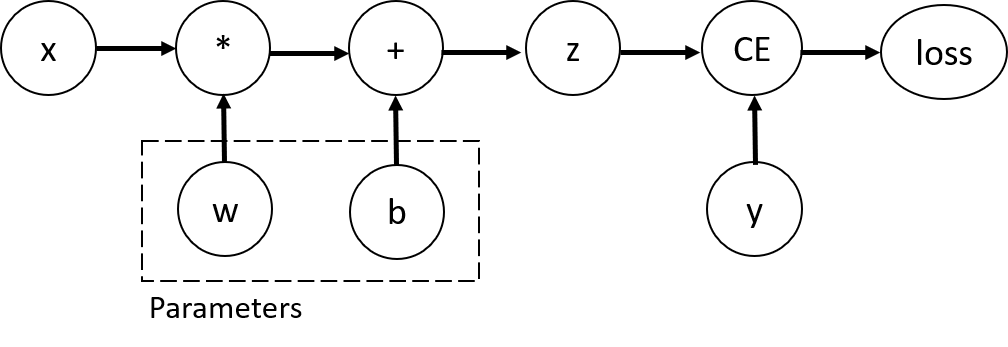

In [2]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x107be5240>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x107be6c20>


In [3]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3233, 0.0952, 0.3070],
        [0.3233, 0.0952, 0.3070],
        [0.3233, 0.0952, 0.3070],
        [0.3233, 0.0952, 0.3070],
        [0.3233, 0.0952, 0.3070]])
tensor([0.3233, 0.0952, 0.3070])


In [4]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

## 训练好以后不需要反向梯度传播
with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [6]:
# 超参
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [8]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.314326  [   64/60000]
loss: 2.291541  [ 6464/60000]
loss: 2.271413  [12864/60000]
loss: 2.256605  [19264/60000]
loss: 2.252217  [25664/60000]
loss: 2.229660  [32064/60000]
loss: 2.221511  [38464/60000]
loss: 2.194255  [44864/60000]
loss: 2.201191  [51264/60000]
loss: 2.147681  [57664/60000]
Test Error: 
 Accuracy: 44.5%, Avg loss: 2.147433 

Epoch 2
-------------------------------
loss: 2.168512  [   64/60000]
loss: 2.146575  [ 6464/60000]
loss: 2.083869  [12864/60000]
loss: 2.094104  [19264/60000]
loss: 2.060322  [25664/60000]
loss: 1.998148  [32064/60000]
loss: 2.014621  [38464/60000]
loss: 1.935157  [44864/60000]
loss: 1.956005  [51264/60000]
loss: 1.854892  [57664/60000]
Test Error: 
 Accuracy: 56.1%, Avg loss: 1.864262 

Epoch 3
-------------------------------
loss: 1.907559  [   64/60000]
loss: 1.864323  [ 6464/60000]
loss: 1.743302  [12864/60000]
loss: 1.781521  [19264/60000]
loss: 1.702980  [25664/60000]
loss: 1.642235  [32064/600

In [5]:
arr = ['2', '10']
arr.sort()

In [6]:
arr

['10', '2']